### 3 APPRENTICES

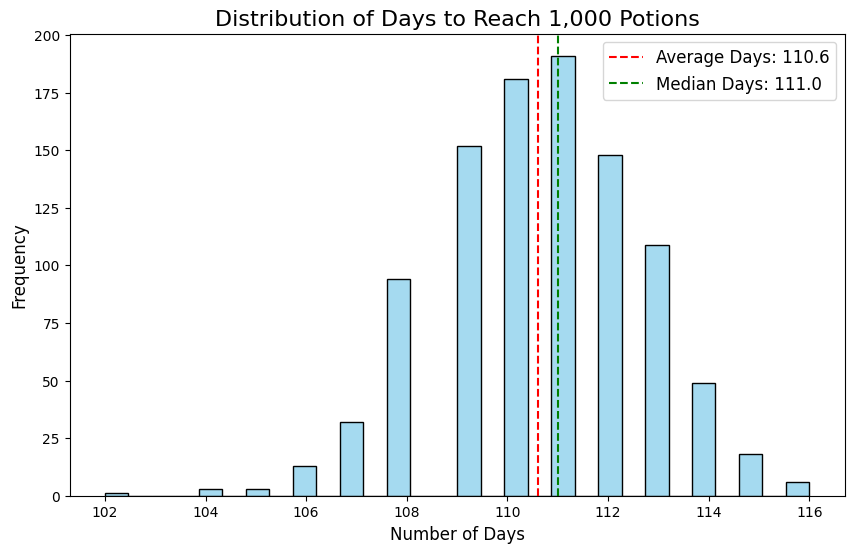

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_with_immediate_boost(days_to_simulate=30, target_potions=1000):
    milestone_tracking = [0, 0, 0]  # Progress towards milestones for each apprentice
    total_potions = 0
    day_count = 0

    while total_potions < target_potions:
        day_count += 1
        is_sunday = day_count % 7 == 0
        daily_output = [0, 0, 0]
        current_milestones = [m // 10 for m in milestone_tracking]

        for i in range(3):
            # Base potion production
            base_output = 1 * (1.07 ** current_milestones[i])  # Apply milestone boost
            if i < 2:  # Apply Haste spell to first 2 apprentices
                base_output *= 1.18

            # Apply Lady Luck boost
            lucky_triggered = np.random.random() < 0.12 and i < 2
            if lucky_triggered:
                milestone_progress = base_output * 2  # Lady Luck doubles output
            else:
                milestone_progress = base_output

            # Update milestone tracking for milestone boost calculation
            milestone_tracking[i] += milestone_progress

            # Apply Empower spell to first 2 apprentices for final output
            final_output = milestone_progress * (1.1 if i < 2 else 1)
            daily_output[i] = final_output

        # Calculate total daily output
        total_daily_output = sum(daily_output)

        # Deduct overtime cost on Sunday
        if is_sunday:
            total_daily_output -= 7

        # Update total potions produced
        total_potions += total_daily_output

    return day_count

# Simulate multiple runs and analyze the results
def simulate_days_to_reach_potions(simulations=1000, target_potions=1000):
    days_to_target = []
    for _ in range(simulations):
        days = simulate_with_immediate_boost(target_potions=target_potions)
        days_to_target.append(days)
    return days_to_target

# Run the simulation and visualize the results
np.random.seed(42)  # For reproducibility
days_to_target = simulate_days_to_reach_potions(simulations=1000)

mean_days = np.mean(days_to_target)
median_days = np.median(days_to_target)
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(days_to_target, color="skyblue", edgecolor="black", bins=30)
plt.title("Distribution of Days to Reach 1,000 Potions", fontsize=16)
plt.xlabel("Number of Days", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(mean_days, color='red', linestyle='--', label=f"Average Days: {mean_days:.1f}")
plt.axvline(median_days, color='green', linestyle='--', label=f"Median Days: {median_days:.1f}")
plt.legend(fontsize=12)
plt.show()

In [ ]:
def simulate_with_separated_final_and_milestone(days_to_simulate=30, target_potions=1000):
    data = []
    milestone_tracking = [0, 0, 0]  # Tracks cumulative potion output for milestones
    total_potions = 0
    day_count = 0

    while total_potions < target_potions:
        day_count += 1
        is_sunday = day_count % 7 == 0
        daily_output = [0, 0, 0]
        milestone_progress = [0, 0, 0]
        current_milestones = [m // 10 for m in milestone_tracking]

        for i in range(3):
            # Base output calculation (Milestone Progress)
            base_output = 1 * (1.07 ** current_milestones[i])  # Apply milestone boost
            if i < 2:
                base_output *= 1.18  # Apply Haste

            # Apply Lady Luck (doubles the output if triggered)
            lucky_triggered = np.random.random() < 0.12 if i < 2 else False
            if lucky_triggered:
                base_output *= 2

            # Milestone Progress is updated directly from base_output
            milestone_progress[i] = base_output
            milestone_tracking[i] += milestone_progress[i]

            # Final output for revenue calculation (includes Empower)
            final_output = base_output
            if i < 2:
                final_output *= 1.1  # Apply Empower

            daily_output[i] = final_output

        total_daily_output = sum(daily_output)
        if is_sunday:
            total_daily_output -= 7  # Deduct overtime cost

        total_potions += total_daily_output

        data.append({
            'Day': day_count,
            'Is_Sunday': is_sunday,
            'A1_Base_Output': daily_output[0],
            'A1_Milestone_Progress': milestone_tracking[0],
            'A1_Milestone_Level': current_milestones[0],
            'A1_Lucky_Triggered': lucky_triggered if 0 == 0 else False,
            'A2_Base_Output': daily_output[1],
            'A2_Milestone_Progress': milestone_tracking[1],
            'A2_Milestone_Level': current_milestones[1],
            'A2_Lucky_Triggered': lucky_triggered if 1 == 1 else False,
            'A3_Base_Output': daily_output[2],
            'A3_Milestone_Progress': milestone_tracking[2],
            'A3_Milestone_Level': current_milestones[2],
            'A3_Lucky_Triggered': False,
            'Daily_Total_Output': total_daily_output,
            'Cumulative_Total_Output': total_potions
        })

    return pd.DataFrame(data)

# Run the corrected simulation
np.random.seed(42)  # Set random seed for reproducibility
df_separated_outputs = simulate_with_separated_final_and_milestone(20)

# Display the updated dataframe to verify milestone progress accuracy
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_separated_outputs.head(20)

,Day,Is_Sunday,A1_Base_Output,A1_Milestone_Progress,A1_Milestone_Level,A1_Lucky_Triggered,A2_Base_Output,A2_Milestone_Progress,A2_Milestone_Level,A2_Lucky_Triggered,A3_Base_Output,A3_Milestone_Progress,A3_Milestone_Level,A3_Lucky_Triggered,Daily_Total_Output,Cumulative_Total_Output
0,1,False,1.30,1.18,0.00,False,1.30,1.18,0.00,False,1.00,1.00,0.00,False,3.60,3.60
1,2,False,1.30,2.36,0.00,False,1.30,2.36,0.00,False,1.00,2.00,0.00,False,3.60,7.19
2,3,False,1.30,3.54,0.00,False,1.30,3.54,0.00,False,1.00,3.00,0.00,False,3.60,10.79
3,4,False,2.60,5.90,0.00,False,1.30,4.72,0.00,False,1.00,4.00,0.00,False,4.89,15.68
4,5,False,1.30,7.08,0.00,False,1.30,5.90,0.00,False,1.00,5.00,0.00,False,3.60,19.28
5,6,False,2.60,9.44,0.00,False,1.30,7.08,0.00,False,1.00,6.00,0.00,False,4.89,24.17
6,7,True,1.30,10.62,0.00,False,1.30,8.26,0.00,False,1.00,7.00,0.00,False,-3.40,20.77
7,8,False,1.39,11.88,1.00,False,1.30,9.44,0.00,False,1.00,8.00,0.00,False,3.69,24.45
8,9,False,1.39,13.15,1.00,False,1.30,10.62,0.00,False,1.00,9.00,0.00,False,3.69,28.14
9,10,False,1.39,14.41,1.00,False,1.39,11.88,1.00,False,1.00,10.00,0.00,False,3.78,31.92


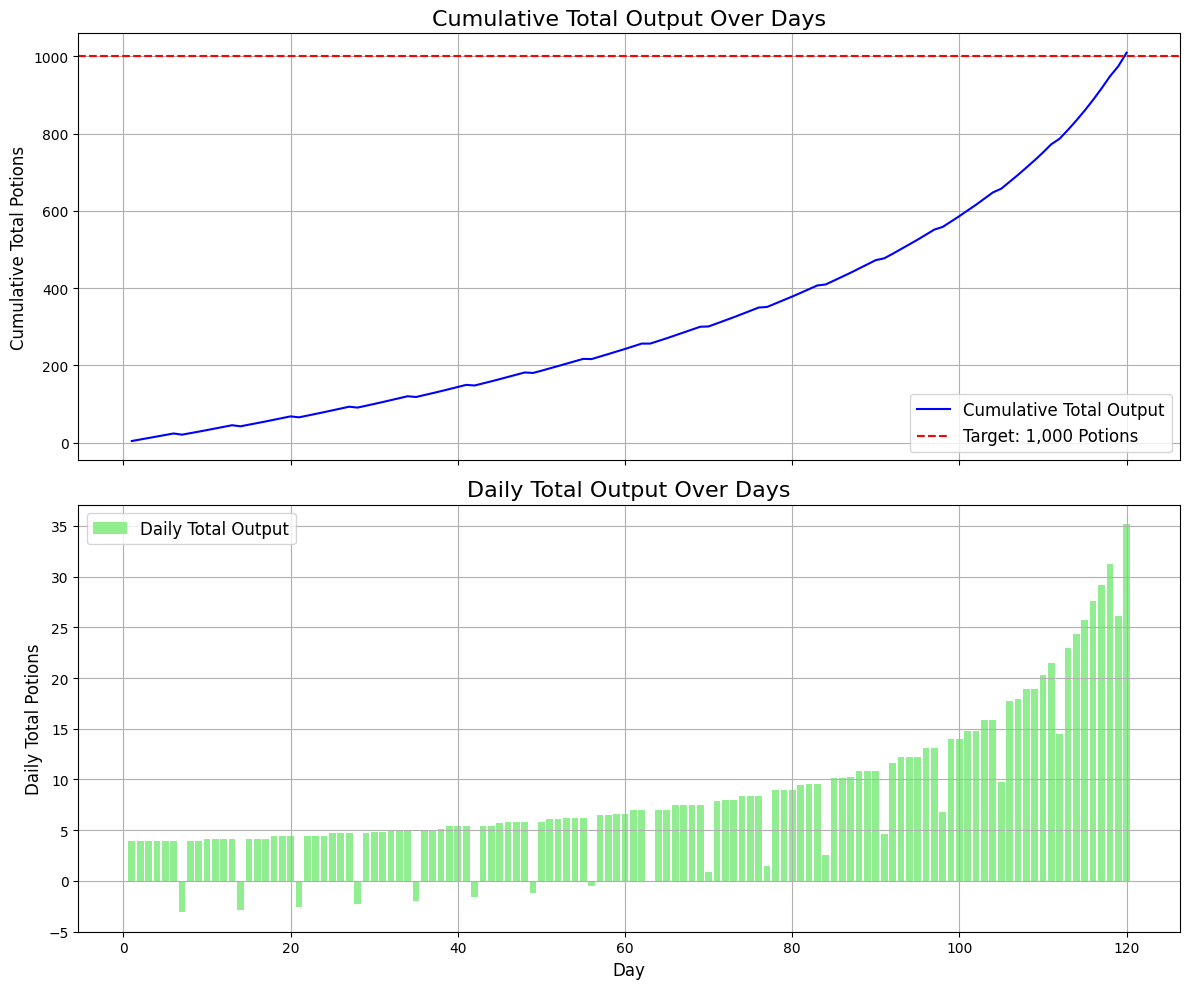

Expected Day to Reach 1,000 Potions: 120.00


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_expected_day_to_target_with_plot(target_potions=1000):
    # Define milestone tracking
    milestone_tracking = [0, 0, 0]  # Progress towards milestones for each apprentice
    total_potions = 0  # Total cumulative potions produced
    day_count = 0  # Days counter until target is reached
    cumulative_totals = []  # To store cumulative total potions over days
    daily_totals = []  # To store daily total output over days

    while total_potions < target_potions:
        day_count += 1
        is_sunday = day_count % 7 == 0  # Check if it's Sunday
        daily_output = [0, 0, 0]  # Daily output for each apprentice
        current_milestone_levels = [int(m // 10) for m in milestone_tracking]  # Milestone levels

        for i in range(3):
            base = 1  # Base output for each apprentice

            # Calculate milestone-boosted output (7% increase for every 10-potions milestone)
            milestone_boost = 1.07 ** current_milestone_levels[i]
            actual_output = base * milestone_boost

            if i < 2:  # Only apprentices 1 and 2 are affected by spells
                # Apply Haste spell (18% increase in work speed)
                actual_output *= 1.18
                # Apply Lady Luck (12% chance to double output)
                expected_output = actual_output * 0.88 + actual_output * 2 * 0.12
            else:
                expected_output = actual_output

            # Apply Empower for the first two apprentices (10% increase in potion price)
            if i < 2:
                expected_output *= 1.1

            # Update the daily output for this apprentice
            daily_output[i] = expected_output

            # Update milestone progress
            milestone_tracking[i] += actual_output  # Milestone progress uses the base milestone-affected output

        # Calculate total daily output
        daily_total = sum(daily_output)

        # Deduct Sunday penalty: Subtract 7 potions if it's Sunday
        if is_sunday:
            daily_total -= 7  # Deduct Sunday penalty

        # Add the daily total to the cumulative potions produced
        total_potions += daily_total

        # Save the cumulative total potions and daily total output for plotting
        cumulative_totals.append(total_potions)
        daily_totals.append(daily_total)

    return day_count, cumulative_totals, daily_totals

# Run the simulation to find the expected number of days and cumulative totals
expected_day, cumulative_totals, daily_totals = simulate_expected_day_to_target_with_plot(target_potions=1000)

# Create subplots for cumulative total output and daily total output
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Cumulative Total Output
axs[0].plot(range(1, len(cumulative_totals) + 1), cumulative_totals, label="Cumulative Total Output", color="blue")
axs[0].axhline(y=1000, color='red', linestyle='--', label="Target: 1,000 Potions")
axs[0].set_title("Cumulative Total Output Over Days", fontsize=16)
axs[0].set_ylabel("Cumulative Total Potions", fontsize=12)
axs[0].legend(fontsize=12)
axs[0].grid(True)

# Plot Daily Total Output
axs[1].bar(range(1, len(daily_totals) + 1), daily_totals, color="lightgreen", label="Daily Total Output")
axs[1].set_title("Daily Total Output Over Days", fontsize=16)
axs[1].set_xlabel("Day", fontsize=12)
axs[1].set_ylabel("Daily Total Potions", fontsize=12)
axs[1].legend(fontsize=12)
axs[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Display the result
print(f"Expected Day to Reach 1,000 Potions: {expected_day:.2f}")

In [ ]:
from scipy import stats

shapiro_stat, shapiro_p = stats.shapiro(days_to_target)
print(f"Shapiro-Wilk Test: Stat={shapiro_stat}, p-value={shapiro_p}")

Shapiro-Wilk Test: Stat=0.9771064252824296, p-value=1.8980446842515175e-11


In [5]:
probability = np.mean(np.array(days_to_target) >= 120)
print(f"P(X >= 120) = {probability}")

P(X >= 120) = 0.0


### 1 WIZARD & 3 APPRENTICE

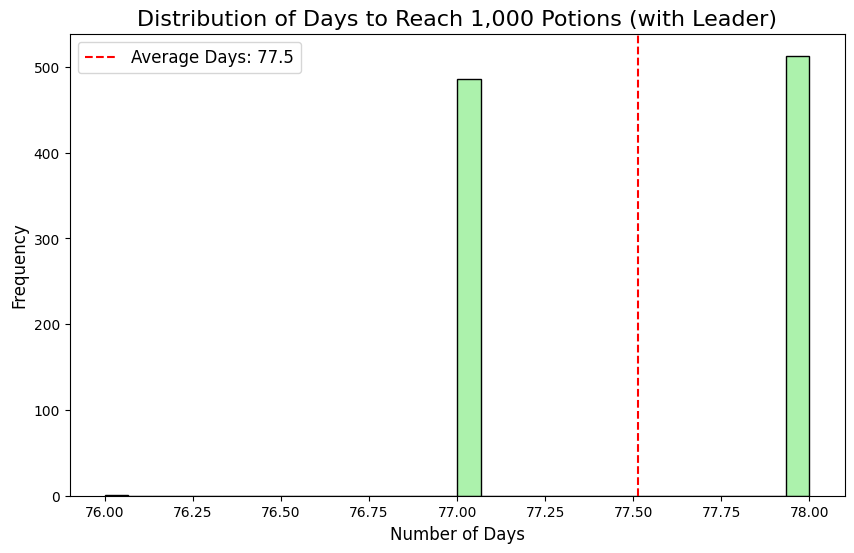

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_with_leader_involved(days_to_simulate=30, target_potions=1000):
    milestone_tracking = [0, 0, 0, 0]  # Progress for 3 apprentices and you (leader)
    total_potions = 0
    day_count = 0

    while total_potions < target_potions:
        day_count += 1
        is_sunday = day_count % 7 == 0
        daily_output = [0, 0, 0, 0]  # Daily output for all participants
        current_milestones = [int(m // 10) for m in milestone_tracking]  # Milestone levels

        for i in range(4):
            # Base potion production
            base_output = 2 if i == 3 else 1  # Leader's base output is 2, apprentices' is 1
            # Apply milestone boosts
            base_output *= (1.07 ** current_milestones[i])

            # Apply effects for apprentices
            if i < 2:  # Apprentices 1 and 2
                base_output *= 1.18  # Haste effect
                if np.random.random() < 0.12:  # Lady Luck (12% chance to double output)
                    base_output *= 2
                base_output *= 1.1  # Empower (10% increase)

            # Finalize daily output for this participant
            daily_output[i] = base_output
            milestone_tracking[i] += base_output  # Update milestone progress

        # Calculate total daily output
        total_daily_output = sum(daily_output)

        # Deduct 7 potions on Sunday
        if is_sunday:
            total_daily_output -= 7

        # Update total potions
        total_potions += total_daily_output

    return day_count

# Simulate multiple runs and analyze the results
def simulate_days_to_reach_potions_with_leader(simulations=1000, target_potions=1000):
    days_to_target = []
    for _ in range(simulations):
        days = simulate_with_leader_involved(target_potions=target_potions)
        days_to_target.append(days)
    return days_to_target

# Run the simulation and visualize the results
np.random.seed(42)  # For reproducibility
days_to_target_with_leader = simulate_days_to_reach_potions_with_leader(simulations=1000)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(days_to_target_with_leader, color="lightgreen", edgecolor="black", bins=30)
plt.title("Distribution of Days to Reach 1,000 Potions (with Leader)", fontsize=16)
plt.xlabel("Number of Days", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(np.mean(days_to_target_with_leader), color='red', linestyle='--',
             label=f"Average Days: {np.mean(days_to_target_with_leader):.1f}")
plt.legend(fontsize=12)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def simulate_with_leader(days_to_simulate=30, target_potions=1000):
    data = []
    milestone_tracking = [0, 0, 0, 0]  # Progress for 3 apprentices and 1 leader
    total_potions = 0
    day_count = 0

    while total_potions < target_potions:
        day_count += 1
        is_sunday = day_count % 7 == 0
        daily_output = [0, 0, 0, 0]  # Daily output for all participants
        milestone_progress = [0, 0, 0, 0]  # Milestone progress for tracking updates
        current_milestones = [int(m // 10) for m in milestone_tracking]  # Current milestone levels

        for i in range(4):
            # Base output calculation
            base_output = 2 if i == 3 else 1  # Leader's base output is 2, apprentices' is 1
            # Apply milestone boosts
            base_output *= (1.07 ** current_milestones[i])

            # Apply additional effects for apprentices
            if i < 3:
                if i < 2:
                    base_output *= 1.18  # Apply Haste
                    # Apply Lady Luck (12% chance to double output)
                    lucky_triggered = np.random.random() < 0.12
                    if lucky_triggered:
                        base_output *= 2
                else:
                    lucky_triggered = False  # No Lady Luck for Apprentice 3

                # Apply Empower (10% increase in revenue for A1 and A2)
                if i < 2:
                    final_output = base_output * 1.1
                else:
                    final_output = base_output
            else:
                # Leader's output (no Haste, Lady Luck, or Empower)
                final_output = base_output
                lucky_triggered = False

            # Update milestone progress
            milestone_progress[i] = base_output
            milestone_tracking[i] += milestone_progress[i]

            # Record daily output
            daily_output[i] = final_output

        # Calculate total daily output
        total_daily_output = sum(daily_output)

        # Deduct 7 potions on Sunday
        if is_sunday:
            total_daily_output -= 7

        # Add the daily total to cumulative potions produced
        total_potions += total_daily_output

        # Append detailed data for tracking
        data.append({
            'Day': day_count,
            'Is_Sunday': is_sunday,
            'A1_Base_Output': daily_output[0],
            'A1_Milestone_Progress': milestone_tracking[0],
            'A1_Milestone_Level': current_milestones[0],
            'A2_Base_Output': daily_output[1],
            'A2_Milestone_Progress': milestone_tracking[1],
            'A2_Milestone_Level': current_milestones[1],
            'A3_Base_Output': daily_output[2],
            'A3_Milestone_Progress': milestone_tracking[2],
            'A3_Milestone_Level': current_milestones[2],
            'Leader_Base_Output': daily_output[3],
            'Leader_Milestone_Progress': milestone_tracking[3],
            'Leader_Milestone_Level': current_milestones[3],
            'Daily_Total_Output': total_daily_output,
            'Cumulative_Total_Output': total_potions
        })

    return pd.DataFrame(data)

# Run the adjusted simulation
np.random.seed(42)  # Set random seed for reproducibility
df_with_leader = simulate_with_leader(target_potions=1000)

# Display the updated dataframe
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_with_leader.head(20)

,Day,Is_Sunday,A1_Base_Output,A1_Milestone_Progress,A1_Milestone_Level,A2_Base_Output,A2_Milestone_Progress,A2_Milestone_Level,A3_Base_Output,A3_Milestone_Progress,A3_Milestone_Level,Leader_Base_Output,Leader_Milestone_Progress,Leader_Milestone_Level,Daily_Total_Output,Cumulative_Total_Output
0,1,False,1.30,1.18,0,1.30,1.18,0,1.00,1.00,0,2.00,2.00,0,5.60,5.60
1,2,False,1.30,2.36,0,1.30,2.36,0,1.00,2.00,0,2.00,4.00,0,5.60,11.19
2,3,False,1.30,3.54,0,1.30,3.54,0,1.00,3.00,0,2.00,6.00,0,5.60,16.79
3,4,False,2.60,5.90,0,1.30,4.72,0,1.00,4.00,0,2.00,8.00,0,6.89,23.68
4,5,False,1.30,7.08,0,1.30,5.90,0,1.00,5.00,0,2.00,10.00,0,5.60,29.28
5,6,False,2.60,9.44,0,1.30,7.08,0,1.00,6.00,0,2.14,12.14,1,7.03,36.31
6,7,True,1.30,10.62,0,1.30,8.26,0,1.00,7.00,0,2.14,14.28,1,-1.26,35.05
7,8,False,1.39,11.88,1,1.30,9.44,0,1.00,8.00,0,2.14,16.42,1,5.83,40.87
8,9,False,1.39,13.15,1,1.30,10.62,0,1.00,9.00,0,2.14,18.56,1,5.83,46.70
9,10,False,1.39,14.41,1,1.39,11.88,1,1.00,10.00,0,2.14,20.70,1,5.92,52.62


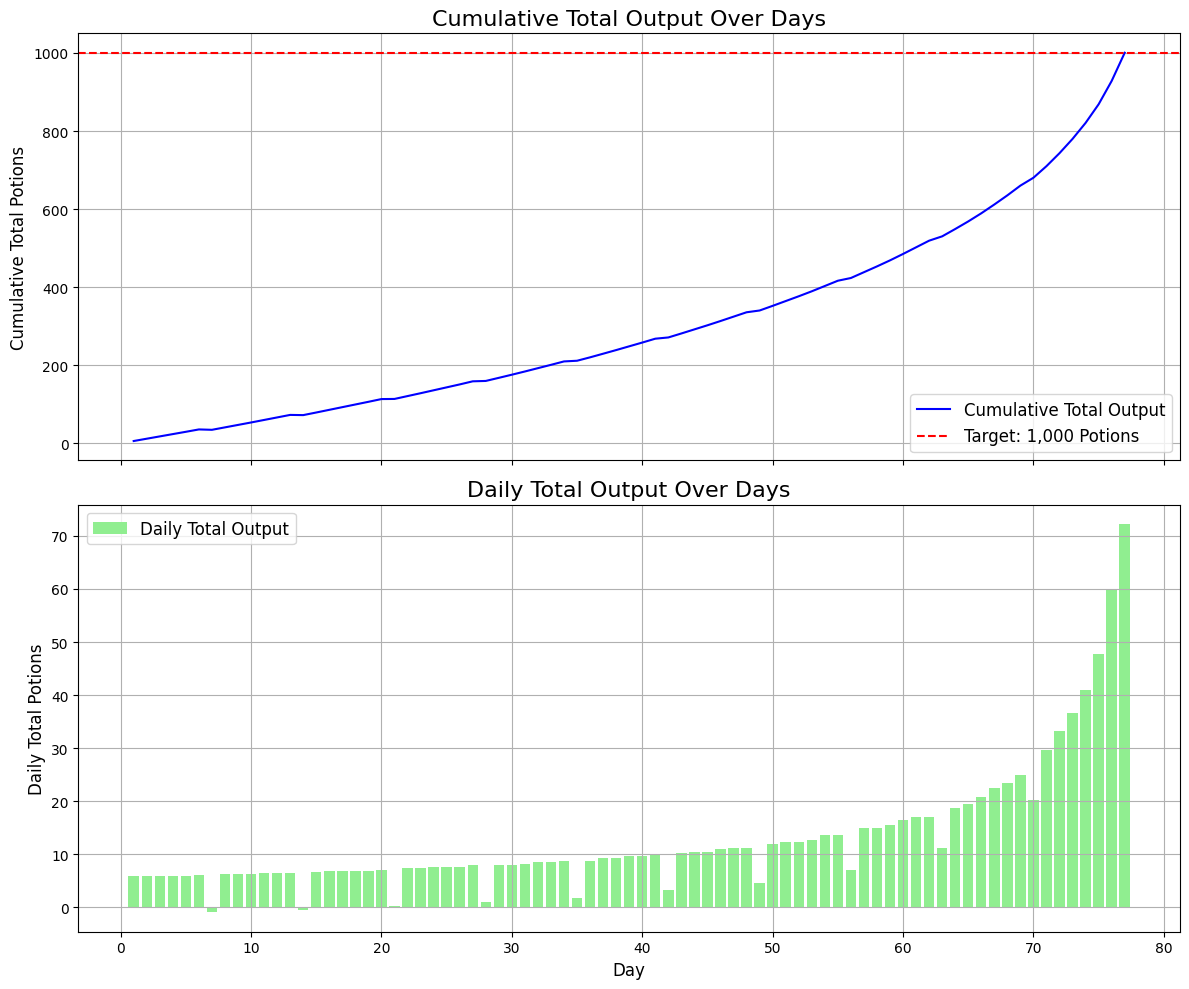

Expected Day to Reach 1,000 Potions with Leader: 77.00


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_expected_day_to_target_with_leader_and_plot(target_potions=1000):
    # Define milestone tracking
    milestone_tracking = [0, 0, 0, 0]  # Progress for 3 apprentices and the leader
    total_potions = 0  # Total cumulative potions produced
    day_count = 0  # Days counter until target is reached
    cumulative_totals = []  # To store cumulative total potions over days
    daily_totals = []  # To store daily total output over days

    # For each participant, calculate expected output
    while total_potions < target_potions:
        day_count += 1
        is_sunday = day_count % 7 == 0  # Check if it's Sunday
        daily_output = [0, 0, 0, 0]  # Daily output for all participants
        current_milestone_levels = [int(m // 10) for m in milestone_tracking]  # Milestone levels

        for i in range(4):
            base = 2 if i == 3 else 1  # Leader's base output is 2, apprentices' is 1

            # Calculate milestone-boosted output (7% increase for every 10-potions milestone)
            milestone_boost = 1.07 ** current_milestone_levels[i]
            actual_output = base * milestone_boost

            if i < 2:  # Only apprentices 1 and 2 are affected by spells
                # Apply Haste spell (18% increase in work speed)
                actual_output *= 1.18
                # Expected output considering Lady Luck: a * 0.88 + a * 2 * 0.12
                expected_output = actual_output * 0.88 + actual_output * 2 * 0.12
                # Apply Empower (10% increase in potion price)
                expected_output *= 1.1
            else:
                # No spells apply to apprentice 3 or leader
                expected_output = actual_output

            # Update the daily output for this participant
            daily_output[i] = expected_output

            # Update milestone progress
            milestone_tracking[i] += expected_output

        # Calculate total daily output
        daily_total = sum(daily_output)

        # Deduct Sunday penalty: Subtract 7 potions if it's Sunday
        if is_sunday:
            daily_total -= 7

        # Add the daily total to the cumulative potions produced
        total_potions += daily_total

        # Save cumulative and daily totals for plotting
        cumulative_totals.append(total_potions)
        daily_totals.append(daily_total)

    return day_count, cumulative_totals, daily_totals

# Run the simulation to find the expected number of days and cumulative totals
expected_day_with_leader, cumulative_totals, daily_totals = simulate_expected_day_to_target_with_leader_and_plot(target_potions=1000)

# Create subplots for cumulative total output and daily total output
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Cumulative Total Output
axs[0].plot(range(1, len(cumulative_totals) + 1), cumulative_totals, label="Cumulative Total Output", color="blue")
axs[0].axhline(y=1000, color='red', linestyle='--', label="Target: 1,000 Potions")
axs[0].set_title("Cumulative Total Output Over Days", fontsize=16)
axs[0].set_ylabel("Cumulative Total Potions", fontsize=12)
axs[0].legend(fontsize=12)
axs[0].grid(True)

# Plot Daily Total Output
axs[1].bar(range(1, len(daily_totals) + 1), daily_totals, color="lightgreen", label="Daily Total Output")
axs[1].set_title("Daily Total Output Over Days", fontsize=16)
axs[1].set_xlabel("Day", fontsize=12)
axs[1].set_ylabel("Daily Total Potions", fontsize=12)
axs[1].legend(fontsize=12)
axs[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Display the result
print(f"Expected Day to Reach 1,000 Potions with Leader: {expected_day_with_leader:.2f}")

In [ ]:
uniform_stat, uniform_p = stats.kstest(days_to_target_with_leader, 'uniform')
print(f"Uniform Test: Stat={uniform_stat}, p-value={uniform_p}")

Uniform Test: Stat=1.0, p-value=0.0


In [ ]:
probability = np.mean(np.array(days_to_target_with_leader) >= 77)
print(f"P(X > 77) = {probability}")

P(X > 77) = 0.999
